# Machine Learning for Genomics Classification of SARS-CoV-2 variants

**Participants**

1. Mike Mwanga
2. Evans Mudibo
3. Hesbon Omwondho
4. Awe Oleitan


In [11]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import array

from sklearn.preprocessing import LabelEncoder #applied in 1D type of dtaset
from sklearn.preprocessing import OneHotEncoder #applied on 2D datasets
from sklearn.preprocessing import LabelBinarizer #applied in 1D type of dtaset

In [45]:
seq_data = pd.read_table('./sequence_data.txt')

seq_data.head(n=20)

,Seq_Id,Sequence,Variant_Id
0,hCoV19/gamma/Italy/CAMUniSa10/2021|EPI_ISL_101...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
1,hCoV19/gamma/Italy/CAMUniSa23/2021|EPI_ISL_101...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
2,hCoV19/gamma/Italy/CAMUniSa111/2021|EPI_ISL_10...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
3,hCoV19/gamma/South Korea/NMCnCoV09/2021|EPI_IS...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
4,hCoV19/gamma/Brazil/PRBT74803FI/2021|EPI_ISL_9...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
5,hCoV19/gamma/Brazil/PRBT75784FI/2021|EPI_ISL_9...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
6,hCoV19/gamma/Brazil/MSFIOCRUZILMD2202575/2021|...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
7,hCoV19/gamma/Brazil/MSFIOCRUZILMD2202558/2021|...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
8,hCoV19/gamma/Brazil/MSFIOCRUZILMD2202555/2021|...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma
9,hCoV19/gamma/Brazil/MSFIOCRUZILMD2202621/2021|...,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,gamma


In [6]:
#Convert variant ID to numeric and remove sequence ID

#seq_data.Variant_ID.unique()
variant = {"gamma" : 1, "delta" : 2, "beta":3, "Alpha":4, "omicron":5 }

seq_data["Variant_Id"] = seq_data["Variant_Id"].map(variant)

cleaned_data = seq_data.drop(["Seq_Id"], axis=1)

cleaned_data.head()

,Sequence,Variant_Id
0,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,1
1,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,1
2,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,1
3,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,1
4,agatctgttctctaaacgaactttaaaatctgtgtggctgtcactc...,1


### Convert the sequence into k-mers.

In [7]:
#function to convert sequences into kmers
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]


cleaned_data['Seq'] = cleaned_data.apply(lambda x: getKmers(x['Sequence']), axis=1)
cleaned_data = cleaned_data.drop('Sequence', axis=1)
cleaned_data.head()

,Variant_Id,Seq
0,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc..."
1,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc..."
2,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc..."
3,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc..."
4,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc..."


##### Converting sequences into array of numericals using label encoder. It assigns numericals based on alphaetical order. i.e "AAAAA" = 0,"AAAAC" = 2. Each uniqure k-mer will be assigned a numerical value.

In [49]:
data = cleaned_data.copy()
label_encoder = LabelEncoder()


encoded = []
for seq in data['Seq']:
    value = array(seq)
    encoded.append(label_encoder.fit_transform(value))

encoded[1]

array([ 551, 2069,  852, ..., 1672, 2986,  820])

In [50]:
lb = LabelBinarizer()

encoded = []
for seq in data['Seq']:
    value = array(seq)
    encoded.append(lb.fit_transform(value))

data["Seq_Encoded"] = encoded

In [51]:
data.head() 

,Variant_Id,Seq,Seq_Encoded
0,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1,"[agatct, gatctg, atctgt, tctgtt, ctgttc, tgttc...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


#### **Approach 2: Convert each nucleotide to numeric values so that we maintain order of sequence in the dataset**

Whether this will result to any different result in the model is something that would require further evalaution. Lets go

 It coverts L length DNA sequence into Lx5 matrix, where A=[1, 0, 0, 0, 0], C=[0, 1, 0, 0, 0], G=[0, 0, 1, 0, 0], T=[0, 0, 0, 1, 0], and N=[0, 0, 0, 0, 1].

 ### **Notes**
CNN Models applied in classifying variants. This are a type of Neural networks and are categorized as supervised type of machine learning. 

[CNN](https://www.freecodecamp.org/news/convolutional-neural-network-tutorial-for-beginners/) are made of layers called nodes. These nodes are functions that calculate the weighted sum of the inputs and return an activation map. This is the convolution part of the neural network. Each node in a layer is defined by its weight values. When you give a layer some data, like an image, it takes the pixel values and picks out some of the visual features. As the layers get more defined, this is called max pooling. It only returns the most relevant features from the layer in the activation map. This is what gets passed to each successive layer until you get the final layer.

The last layer of a CNN is the classification layer which determines the predicted value based on the activation map. If you pass a handwriting sample to a CNN, the classification layer will tell you what letter is in the image. This is what autonomous vehicles use to determine whether an object is another car, a person, or some other obstacle.

Training a CNN is similar to training many other machine learning algorithms. You'll start with some training data that is separate from your test data and you'll tune your weights based on the accuracy of the predicted values. Just be careful that you don't overfit your model.

**Different types of CNNs**

1D CNN: With these, the CNN kernel moves in one direction. 1D CNNs are usually used on time-series data.

2D CNN: These kinds of CNN kernels move in two directions. You'll see these used with image labelling and processing.

3D CNN: This kind of CNN has a kernel that moves in three directions. With this type of CNN, researchers use them on 3D images like CT scans and MRIs.

[**Practise CNN Modelling**](https://www.freecodecamp.org/news/convolutional-neural-network-tutorial-for-beginners/)

A convolution neural network has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are: [link](https://www.simplilearn.com/tutorials/deep-learning-tutorial/convolutional-neural-network)

1. **Convolution layer**

First layer used to extract features and generate a feature map.

2. **ReLU layer**

Stands for Rectified Linear Unit. Rectifies features by converting negative values to zero. The dataset is scanned by convolution and ReLu to identify important features.

3. **Pooling layer**

A downsampling step that reduces dimensionality of feature maps. 
This is followed by flattening where all  resulting pooled features are pooled into a long continous  linear vector.

4. **Fully connected layer**

The flattened matrix is  fed into a fully connected layer to determine or predict outcome.


**The CNN Layers**

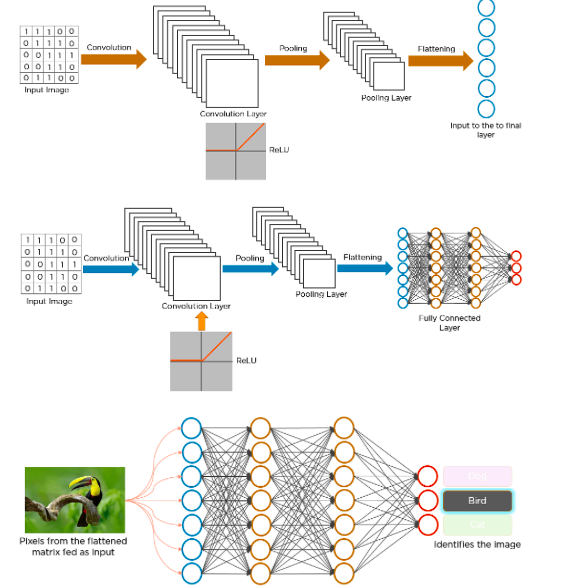

In [41]:
%matplotlib inline
from IPython.display import Image
Image("CNN_Archintectire.png")

In [34]:
names = {"pike", "Pink", "ajkdn", "djkn"}

others = {"jkds","djksnd","djks","uedwu"}

list(zip(names,others))

[('djkn', 'djks'), ('Pink', 'jkds'), ('ajkdn', 'djksnd'), ('pike', 'uedwu')]